In [1]:
import polars as pl
import matplotlib.pyplot as plt

FILE_PATH = "../csv_files/processed_small_dataset.csv"

In [2]:
genre_mapping = {
    1: 'Avant-Garde',
    2: 'International',
    3: 'Blues',
    4: 'Jazz',
    5: 'Classical',
    6: 'Novelty',
    7: 'Comedy',
    8: 'Old-Time / Historic',
    9: 'Country',
    10: 'Pop',
    11: 'Disco',
    12: 'Rock',
    13: 'Easy Listening',
    14: 'Soul-RnB',
    15: 'Electronic',
    16: 'Sound Effects',
    17: 'Folk',
    18: 'Soundtrack',
    19: 'Funk',
    20: 'Spoken',
    21: 'Hip-Hop',
    22: 'Audio Collage',
    25: 'Punk',
    26: 'Post-Rock',
    27: 'Lo-Fi',
    30: 'Field Recordings',
    31: 'Metal',
    32: 'Noise',
    33: 'Psych-Folk',
    36: 'Krautrock',
    37: 'Jazz: Vocal',
    38: 'Experimental',
    41: 'Electroacoustic',
    42: 'Ambient Electronic',
    43: 'Radio Art',
    45: 'Loud-Rock',
    46: 'Latin America',
    47: 'Drone',
    49: 'Free-Folk',
    53: 'Noise-Rock',
    58: 'Psych-Rock',
    63: 'Bluegrass',
    64: 'Electro-Punk',
    65: 'Radio',
    66: 'Indie-Rock',
    70: 'Industrial',
    71: 'No Wave',
    74: 'Free-Jazz',
    76: 'Experimental Pop',
    77: 'French',
    79: 'Reggae - Dub',
    81: 'Afrobeat',
    83: 'Nerdcore',
    85: 'Garage',
    86: 'Indian',
    88: 'New Wave',
    89: 'Post-Punk',
    90: 'Sludge',
    92: 'African',
    94: 'Freak-Folk',
    97: 'Jazz: Out',
    98: 'Progressive',
    100: 'Alternative Hip-Hop',
    101: 'Death-Metal',
    102: 'Middle East',
    103: 'Singer-Songwriter',
    107: 'Ambient',
    109: 'Hardcore',
    111: 'Power-Pop',
    113: 'Space-Rock',
    117: 'Polka',
    118: 'Balkan',
    125: 'Unclassifiable',
    130: 'Europe',
    137: 'Americana',
    138: 'Spoken Weird',
    166: 'Interview',
    167: 'Black-Metal',
    169: 'Rockabilly',
    170: 'Easy Listening: Vocal',
    171: 'Brazilian',
    172: 'Asia-Far East',
    173: 'N. Indian Traditional',
    174: 'South Indian Traditional',
    175: 'Bollywood',
    176: 'Pacific',
    177: 'Celtic',
    178: 'Be-Bop',
    179: 'Big Band/Swing',
    180: 'British Folk',
    181: 'Techno',
    182: 'House',
    183: 'Glitch',
    184: 'Minimal Electronic',
    185: 'Breakcore - Hard',
    186: 'Sound Poetry',
    187: '20th Century Classical',
    188: 'Poetry',
    189: 'Talk Radio',
    214: 'North African',
    224: 'Sound Collage',
    232: 'Flamenco',
    236: 'IDM',
    240: 'Chiptune',
    247: 'Musique Concrete',
    250: 'Improv',
    267: 'New Age',
    286: 'Trip-Hop',
    296: 'Dance',
    297: 'Chip Music',
    311: 'Lounge',
    314: 'Goth',
    322: 'Composed Music',
    337: 'Drum & Bass',
    359: 'Shoegaze',
    360: 'Kid-Friendly',
    361: 'Thrash',
    362: 'Synth Pop',
    374: 'Banter',
    377: 'Deep Funk',
    378: 'Spoken Word',
    400: 'Chill-out',
    401: 'Bigbeat',
    404: 'Surf',
    428: 'Radio Theater',
    439: 'Grindcore',
    440: 'Rock Opera',
    441: 'Opera',
    442: 'Chamber Music',
    443: 'Choral Music',
    444: 'Symphony',
    456: 'Minimalism',
    465: 'Musical Theater',
    468: 'Dubstep',
    491: 'Skweee',
    493: 'Western Swing',
    495: 'Downtempo',
    502: 'Cumbia',
    504: 'Latin',
    514: 'Sound Art',
    524: 'Romany (Gypsy)',
    538: 'Compilation',
    539: 'Rap',
    542: 'Breakbeat',
    567: 'Gospel',
    580: 'Abstract Hip-Hop',
    602: 'Reggae - Dancehall',
    619: 'Spanish',
    651: 'Country & Western',
    659: 'Contemporary Classical',
    693: 'Wonky',
    695: 'Jungle',
    741: 'Klezmer',
    763: 'Holiday',
    806: 'hiphop',
    808: 'Salsa',
    810: 'Nu-Jazz',
    811: 'Hip-Hop Beats',
    906: 'Modern Jazz',
    1032: 'Turkish',
    1060: 'Tango',
    1156: 'Fado',
    1193: 'Christmas',
    1235: 'Instrumental'
}

In [3]:
df = pl.read_csv(FILE_PATH)
df

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food"""
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World"""
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway"""
140,1,"""2008-11-26 01:49:59""","""2007-05-22 00:00:00""",null,1,61,"""<p>Alec K. Redfearn &amp; The …",1300,"""Alec K. Refearn, Rob Pemberton""","""[]""","""The Blind Spot""",1,"""Album""","""1999-01-01 00:00:00""",null,null,"""<p>The Eyesores originally for…",0,"""2008-11-26 01:47:44""",11,54,41.823989,"""Providence, RI""",-71.412834,null,"""Alec K. Redfearn & the Eyesore…","""Haldols, Amoebic Ensemble, Mr.…","""['alec k redfearn and the eyes…","""http://www.aleckredfearn.com""","""http://en.wikipedia.org/wiki/A…","""training""","""small""",128000,0,null,"""2008-11-26 01:44:07""","""2008-11-26 00:00:00""",253,5,"""Folk""","""[17]""","""[17]""",null,1593,"""en""","""Attribution-Noncommercial-No D…",1299,null,2,null,"""[]""","""Queen Of The Wires"""
141,0,"""2008-11-26 01:49:57""","""2009-01-16 00:00:00""",null,1,60,"""<p>A full ensamble of strings,…",1304,null,"""[]""","""Every Man For Himself""",2,"""Album""","""1999-01-01 00:00:00""",null,null,"""<p>The Eyesores originally for…",0,"""2008-11-26 01:47:44""",11,54,41.823989,"""Providence, RI""",-71.412834,null,"""Alec K. Redfearn & the Eyesore…","""Haldols, Amoebic Ensemble, Mr.…","""['alec k redfearn and the eyes…","""http://www.aleckredfearn.com""","""http://en.wikipedia.org/wiki/A…","""training""","""small""",128000,0,null,"""2008-11-26 01:44:10""","""2008-11-26 00:00:00""",18

In [4]:
parsed_df = df.with_columns([
  pl.col("genres")
    .str.strip_chars('[]" ')
    .str.split(",")
    .alias("parsed_genres_list")
  ]
)
parsed_df

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,list[str]
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""","[""21""]"
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""","[""21""]"
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""","[""10""]"
140,1,"""2008-11-26 01:49:59""","""2007-05-22 00:00:00""",null,1,61,"""<p>Alec K. Redfearn &amp; The …",1300,"""Alec K. Refearn, Rob Pemberton""","""[]""","""The Blind Spot""",1,"""Album""","""1999-01-01 00:00:00""",null,null,"""<p>The Eyesores originally for…",0,"""2008-11-26 01:47:44""",11,54,41.823989,"""Providence, RI""",-71.412834,null,"""Alec K. Redfearn & the Eyesore…","""Haldols, Amoebic Ensemble, Mr.…","""['alec k redfearn and the eyes…","""http://www.aleckredfearn.com""","""http://en.wikipedia.org/wiki/A…","""training""","""small""",128000,0,null,"""2008-11-26 01:44:07""","""2008-11-26 00:00:00""",253,5,"""Folk""","""[17]""","""[17]""",null,1593,"""en""","""Attribution-Noncommercial-No D…",1299,null,2,null,"""[]""","""Queen Of The Wires""","[""17""]"
141,0,"""2008-11-26 01:49:57""","""2009-01-16 00:00:00""",null,1,60,"""<p>A full ensamble of strings,…",1304,null,"""[]""","""Every Man For Himself""",2,"""Album""","""1999-01-01 00:00:00""",null,null,"""<p>The Eyesores originally for…",0,"""2008-11-26 01:47:44""",11,54,41.823989,"""Providence, RI""",-71.412834,null,"""Alec K. Redfearn & the Eyesore…","""Haldols, Amoebic Ensemble, Mr.…","""['alec k redfearn and the eyes…","""http://www.aleckredfearn.com""","""http://en.wikipedia.org/wiki/A…","""training""","""smal

In [5]:
exploded = parsed_df.explode("parsed_genres_list")
exploded = exploded.with_columns(
    pl.col("parsed_genres_list")
    .str.strip_chars()
)

In [6]:
exploded.select("parsed_genres_list").sample(20)

parsed_genres_list
str
"""400"""
"""15"""
"""1"""
"""362"""
"""101"""
…
"""118"""
"""337"""
"""10"""


In [7]:
exploded = exploded.filter(
    pl.col("parsed_genres_list").str.strip_chars() != ""
)

In [8]:
exploded.with_columns(
    pl.col("parsed_genres_list")
    .cast(pl.Int16)
)

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,i16
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""",21
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""",21
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""",10
140,1,"""2008-11-26 01:49:59""","""2007-05-22 00:00:00""",null,1,61,"""<p>Alec K. Redfearn &amp; The …",1300,"""Alec K. Refearn, Rob Pemberton""","""[]""","""The Blind Spot""",1,"""Album""","""1999-01-01 00:00:00""",null,null,"""<p>The Eyesores originally for…",0,"""2008-11-26 01:47:44""",11,54,41.823989,"""Providence, RI""",-71.412834,null,"""Alec K. Redfearn & the Eyesore…","""Haldols, Amoebic Ensemble, Mr.…","""['alec k redfearn and the eyes…","""http://www.aleckredfearn.com""","""http://en.wikipedia.org/wiki/A…","""training""","""small""",128000,0,null,"""2008-11-26 01:44:07""","""2008-11-26 00:00:00""",253,5,"""Folk""","""[17]""","""[17]""",null,1593,"""en""","""Attribution-Noncommercial-No D…",1299,null,2,null,"""[]""","""Queen Of The Wires""",17
141,0,"""2008-11-26 01:49:57""","""2009-01-16 00:00:00""",null,1,60,"""<p>A full ensamble of strings,…",1304,null,"""[]""","""Every Man For Himself""",2,"""Album""","""1999-01-01 00:00:00""",null,null,"""<p>The Eyesores originally for…",0,"""2008-11-26 01:47:44""",11,54,41.823989,"""Providence, RI""",-71.412834,null,"""Alec K. Redfearn & the Eyesore…","""Haldols, Amoebic Ensemble, Mr.…","""['alec k redfearn and the eyes…","""http://www.aleckredfearn.com""","""http://en.wikipedia.org/wiki/A…","""training""","""small""",128000,0,null,"""2008-11-26 01:44

In [9]:
exploded = exploded.with_columns([
    pl.col("parsed_genres_list")
    .replace(genre_mapping)
    .alias("parsed_genres_list_names")
    ]
)
exploded

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list,parsed_genres_list_names
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,str,str
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""","""21""","""Hip-Hop"""
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""","""21""","""Hip-Hop"""
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""","""10""","""Pop"""
140,1,"""2008-11-26 01:49:59""","""2007-05-22 00:00:00""",null,1,61,"""<p>Alec K. Redfearn &amp; The …",1300,"""Alec K. Refearn, Rob Pemberton""","""[]""","""The Blind Spot""",1,"""Album""","""1999-01-01 00:00:00""",null,null,"""<p>The Eyesores originally for…",0,"""2008-11-26 01:47:44""",11,54,41.823989,"""Providence, RI""",-71.412834,null,"""Alec K. Redfearn & the Eyesore…","""Haldols, Amoebic Ensemble, Mr.…","""['alec k redfearn and the eyes…","""http://www.aleckredfearn.com""","""http://en.wikipedia.org/wiki/A…","""training""","""small""",128000,0,null,"""2008-11-26 01:44:07""","""2008-11-26 00:00:00""",253,5,"""Folk""","""[17]""","""[17]""",null,1593,"""en""","""Attribution-Noncommercial-No D…",1299,null,2,null,"""[]""","""Queen Of The Wires""","""17""","""Folk"""
141,0,"""2008-11-26 01:49:57""","""2009-01-16 00:00:00""",null,1,60,"""<p>A full ensamble of strings,…",1304,null,"""[]""","""Every Man For Himself""",2,"""Album""","""1999-01-01 00:00:00""",null,null,"""<p>The Eyesores originally for…",0,"""2008-11-26 01:47:44""",11,54,41.823989,"""Providence, RI""",-71.412834,null,"""Alec K. Redfearn & the Eyesore…","""Haldols, Amoebic Ensemble, Mr.…","""['alec k redfearn and the eyes…","""http://www.aleckredfearn.c

In [10]:
grouped = (
    exploded
    .group_by("track_id")
    .agg(pl.col("parsed_genres_list_names").alias("genre_names"))
    .sort(by="track_id")
)

grouped

track_id,genre_names
i64,list[str]
2,"[""Hip-Hop""]"
5,"[""Hip-Hop""]"
10,"[""Pop""]"
140,"[""Folk""]"
141,"[""Folk""]"
…,…
154308,"[""Hip-Hop"", ""Rap"", ""Hip-Hop Beats""]"
154309,"[""Hip-Hop"", ""Rap"", ""Hip-Hop Beats""]"
154413,"[""Experimental Pop""]"


In [11]:
grouped = ( 
    grouped
    .group_by("genre_names")
    .agg(pl.col("track_id").count().alias("count"))
)

grouped

genre_names,count
list[str],u32
"[""Electronic"", ""Ambient Electronic"", ""Chill-out""]",29
"[""Punk"", ""Garage"", ""Surf""]",6
"[""Indie-Rock"", ""Surf""]",1
"[""International"", ""Latin America"", ""Cumbia""]",6
"[""Electronic"", ""Techno"", ""House""]",23
…,…
"[""Electronic"", ""Dubstep"", ""Downtempo""]",1
"[""Loud-Rock"", ""Death-Metal"", ""Hardcore""]",4
"[""Sound Poetry""]",4


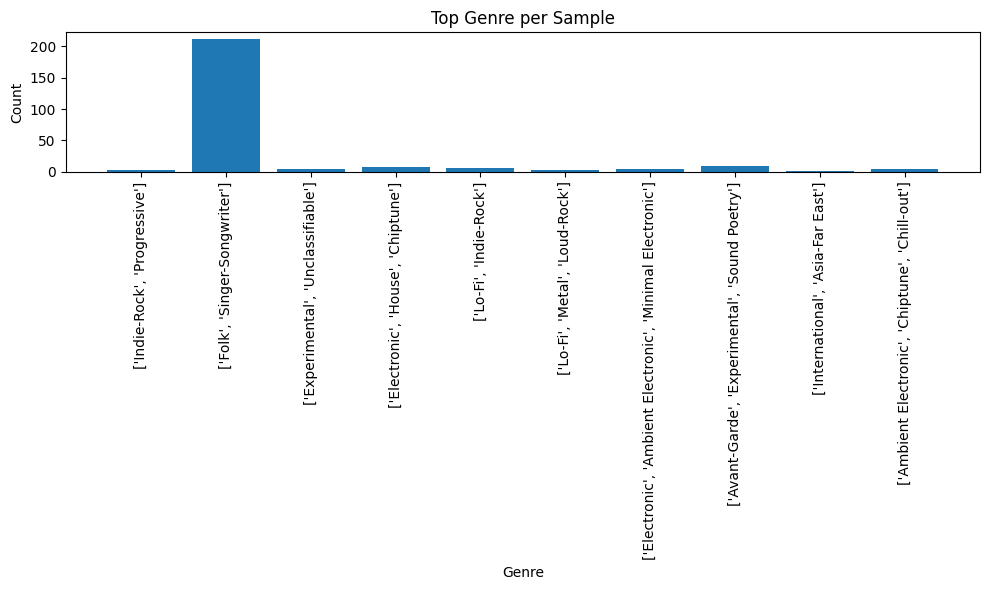

In [12]:
# Extract columns as lists directly from Polars
grouped = grouped.sample(10)
genres = grouped["genre_names"].to_list()
genres = [str(i) for i in genres]
counts = grouped["count"].to_list()

# Plot
plt.figure(figsize=(10,6))
plt.bar(genres, counts)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top Genre per Sample")
plt.tight_layout()
plt.show()